In [1]:
import numpy as np
import torch
import torchvision as tv
import matplotlib.pyplot as plt
from tqdm import tqdm

**1. Загрузка данных**

In [3]:
data_train = tv.datasets.FashionMNIST('D:\НЕТОЛОГИЯ\Deep ML\файлы', download = True, train = True, transform = tv.transforms.ToTensor())
data_test = tv.datasets.FashionMNIST('D:\НЕТОЛОГИЯ\Deep ML\файлы', download = True, train = False, transform = tv.transforms.ToTensor())

In [66]:
print('число классов:', len(data_train.classes))
print()
print('train:', data_train.data.shape, data_train)
print()
print('test:', data_test.data.shape, data_test)

число классов: 10

train: torch.Size([60000, 28, 28]) Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: D:\НЕТОЛОГИЯ\Deep ML\файлы
    Split: Train
    StandardTransform
Transform: ToTensor()

test: torch.Size([10000, 28, 28]) Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: D:\НЕТОЛОГИЯ\Deep ML\файлы
    Split: Test
    StandardTransform
Transform: ToTensor()


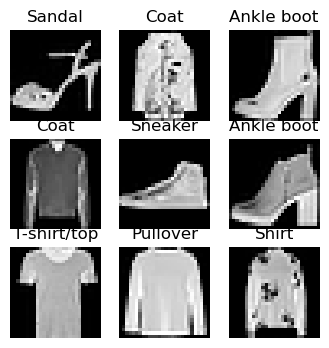

In [5]:
# Визуализация данных
labels_map  = {}
for i, n in enumerate(data_train.classes):
    labels_map[i] = n

figure = plt.figure(figsize = (4, 4))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data_train), size = (1,)).item()
    img, label = data_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap = 'gray')
plt.show()

**2. Создание модели**. В результате экспериментов наилучшее качество показала модель со следующими параметрами:
 - 2 линейных слоя
 - функция активации GELU  
 - методо оптимизации RMSProp
 - learning rate = 0.001
 - число эпох = 40

In [142]:
batch_size = 256
input_shape = data_train.data.shape[1] * data_train.data.shape[2]
class_number = len(data_train.classes)

train = torch.utils.data.DataLoader(data_train, batch_size = batch_size)
test = torch.utils.data.DataLoader(data_test, batch_size = batch_size)

model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(input_shape, 512),
    torch.nn.GELU(),
    torch.nn.Linear(512, 10)
)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.001)
num_epochs = 40

model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): GELU(approximate='none')
  (3): Linear(in_features=512, out_features=10, bias=True)
)

**3. Обучение модели**

In [144]:
for epoch in range(num_epochs):
    train_iters, train_passed = 0., 0.
    train_loss, train_acc = 0., 0.
    
    model.train()
    for x, y in train:
        optimizer.zero_grad()
        y_pred = model(x)
        l = loss(y_pred, y)
        l.backward()
        optimizer.step()
        
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim = 1) == y).sum().item()
        train_iters += 1
        train_passed += len(x)
    
    if epoch % 5 == 0 or epoch == 39:    
        print(f'ep: {epoch}, loss: {train_loss/train_iters}, accuracy: {train_acc/train_passed}')

ep: 0, loss: 0.6125149303294243, accuracy: 0.7905666666666666
ep: 5, loss: 0.2822121223870744, accuracy: 0.89535
ep: 10, loss: 0.20911943157936663, accuracy: 0.9219333333333334
ep: 15, loss: 0.1595812790571375, accuracy: 0.94235
ep: 20, loss: 0.12476826173828003, accuracy: 0.9560666666666666
ep: 25, loss: 0.09657351854950824, accuracy: 0.9663333333333334
ep: 30, loss: 0.08124710766083383, accuracy: 0.9718166666666667
ep: 35, loss: 0.065320599816264, accuracy: 0.977
ep: 39, loss: 0.0681374070729981, accuracy: 0.9778666666666667


**4. Оценка качества**

In [145]:
test_iters, test_passed  = 0., 0.
test_loss, test_acc = 0., 0.
    
model.eval()
for x, y in test:
    y_pred = model(x)
    l = loss(y_pred, y)

    test_loss += l.item()
    test_acc += (y_pred.argmax(dim = 1) == y).sum().item()
    test_iters += 1
    test_passed += len(x)

print(f'accuracy: {test_acc/test_passed}')

accuracy: 0.8861
